In [62]:
pip install --upgrade seaborn

Requirement already up-to-date: seaborn in c:\users\r04425\anaconda3\lib\site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [65]:
data = pd.read_csv('pop_worldometer_data.csv')
data.head()

,Country (or dependency),Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
1,India,1380004385,0.99,13586631,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
2,United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83


In [66]:
data.shape

(235, 11)

In [67]:
data.describe()

,Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
count,2.350000e+02,206.000000,2.350000e+02,235.000000,2.350000e+02,201.000000,201.000000,201.000000,222.000000,235.000000
mean,3.316936e+07,1.330146,3.460878e+05,475.770213,5.535918e+05,6.283582,2.693035,30.606965,59.234234,0.425447
std,1.351374e+08,0.930457,1.128260e+06,2331.285935,1.687796e+06,123291.887548,1.264496,9.127965,24.230400,1.733723
min,8.010000e+02,0.000000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,1.100000,15.000000,0.000000,0.000000
25%,3.988760e+05,0.592500,4.240000e+02,37.000000,2.545000e+03,-10047.000000,1.700000,22.000000,43.000000,0.010000
50%,5.459642e+06,1.140000,3.917000e+04,95.000000,7.724000e+04,-852.000000,2.300000,30.000000,60.500000,0.070000
75%,2.057705e+07,1.957500,2.496600e+05,239.500000,4.038200e+05,9741.000000,3.600000,39.000000,79.000000,0.265000
max,1.439324e+09,3.840000,1.358663e+07,26337.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


In [68]:
data.isnull().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change %            29
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                13
World Share %               0
dtype: int64

In [69]:
data=data.fillna(data.mean())

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change %          235 non-null    float64
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    float64
 5   Land Area (Km²)          235 non-null    float64
 6   Migrants (net)           235 non-null    float64
 7   Fert. Rate               235 non-null    float64
 8   Med. Age                 235 non-null    float64
 9   Urban Pop %              235 non-null    float64
 10  World Share %            235 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 20.3+ KB


In [71]:
data.head()

,Country (or dependency),Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
1,India,1380004385,0.99,13586631,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
2,United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83


In [72]:
top6 = data[data.index<=5]
others = data[data.index>5]
others['Country (or dependency)'] = 'Others'
pie_plot = top6.append(others)
pie_plot = pie_plot.groupby('Country (or dependency)').sum().sort_values('Population (2020)',ascending=False).reset_index()

In [73]:
top6

,Country (or dependency),Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
1,India,1380004385,0.99,13586631,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
2,United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
5,Brazil,212559417,0.72,1509890,25.0,8358140.0,21200.0,1.7,33.0,88.0,2.73


Text(0.5, 1.0, 'World Population ')

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


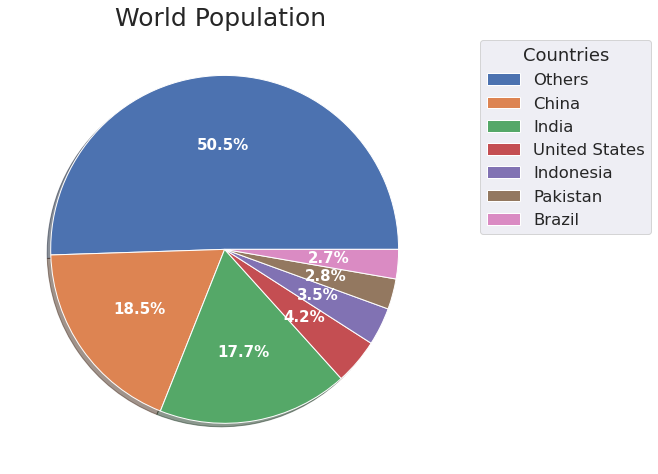

In [74]:
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(aspect="equal"))
ingredients = pie_plot['Country (or dependency)']
data2= pie_plot['Population (2020)']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data2, labels = pie_plot['Country (or dependency)'], autopct=lambda pct: func(pct, data2),
                                  textprops=dict(color="w"),shadow=True)
ax.legend(wedges, ingredients,
          title="Countries",
          loc="best",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")
ax.set_title("World Population ", size=25)

In [13]:
grow_fast=data.sort_values('Yearly Change %',ascending=False).head(10)
grow_most=data.sort_values('Net Change',ascending=False).head(10)
density_most=data.sort_values('Density (P/Km²)',ascending=False).head(10)

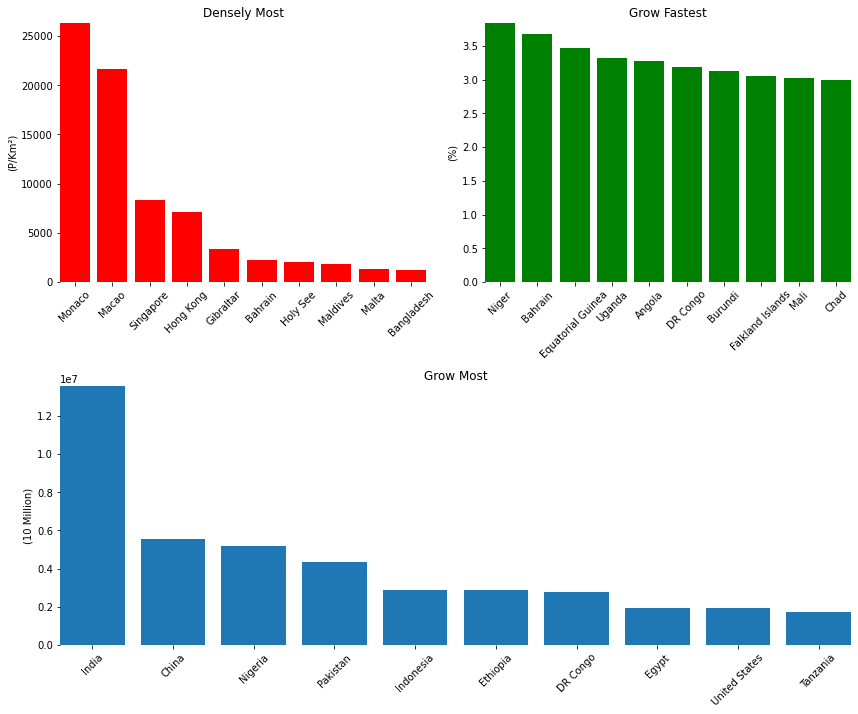

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True,figsize=(12,10))
ax1 = plt.subplot(221)
ax1.margins(0)           # Default margin is 0.05, value 0 means fit
ax1.bar(density_most['Country (or dependency)'], density_most['Density (P/Km²)'],color='r')
plt.ylabel("(P/Km²)")
ax1.set_title('Densely Most')
plt.xticks(rotation=45)

ax2 = plt.subplot(222)
ax2.margins(0)           # Default margin is 0.05, value 0 means fit
ax2.bar(grow_fast['Country (or dependency)'], grow_fast['Yearly Change %'],color='g')
ax2.set_title('Grow Fastest')
plt.ylabel("(%)")
plt.xticks(rotation=45)

ax3 = plt.subplot(212)
ax3.margins(0)           # Default margin is 0.05, value 0 means fit
ax3.bar(grow_most['Country (or dependency)'], grow_most['Net Change'])
plt.ylabel("(10 Million)")
ax3.set_title('Grow Most')
plt.xticks(rotation=45)
fig.tight_layout(pad=1.0)
sns.despine(left=True, bottom=True, right=True)

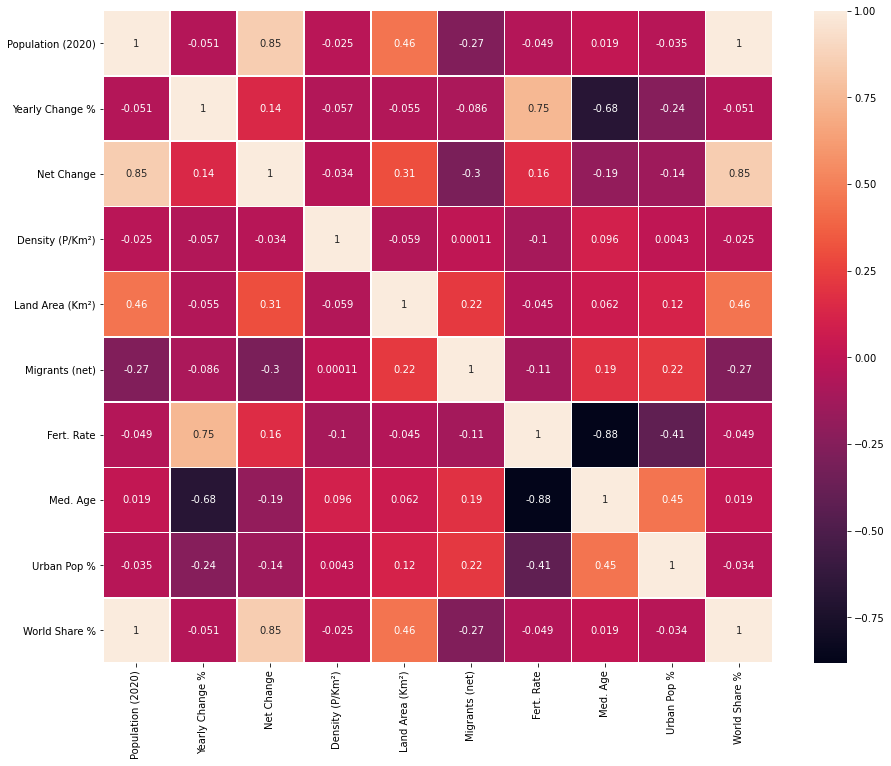

In [15]:
corr = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, linewidths=0.5)

In [16]:
dataset = data
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:,1].values

In [17]:
print(X)

[[3.90000000e-01 5.54009000e+06 1.53000000e+02 ... 3.80000000e+01
  6.10000000e+01 1.84700000e+01]
 [9.90000000e-01 1.35866310e+07 4.64000000e+02 ... 2.80000000e+01
  3.50000000e+01 1.77000000e+01]
 [5.90000000e-01 1.93773400e+06 3.60000000e+01 ... 3.80000000e+01
  8.30000000e+01 4.25000000e+00]
 ...
 [6.80000000e-01 1.10000000e+01 6.00000000e+00 ... 3.06069652e+01
  4.60000000e+01 0.00000000e+00]
 [1.27000000e+00 1.70000000e+01 1.36000000e+02 ... 3.06069652e+01
  0.00000000e+00 0.00000000e+00]
 [2.50000000e-01 2.00000000e+00 2.00300000e+03 ... 3.06069652e+01
  5.92342342e+01 0.00000000e+00]]


In [18]:
print(y)

[1439323776 1380004385  331002651  273523615  220892340  212559417
  206139589  164689383  145934462  128932753  126476461  114963588
  109581078  102334404   97338579   89561403   84339067   83992949
   83783942   69799978   67886011   65273511   60461826   59734218
   59308690   54409800   53771296   51269185   50882891   46754778
   45741007   45195774   43851044   43849260   43733762   40222493
   38928346   37846611   37742154   36910560   34813871   33469203
   32971854   32866272   32365999   31255435   31072940   29825964
   29136808   28435940   27691018   26545863   26378274   25778816
   25499884   24206644   23816775   21413249   20903273   20250833
   19237691   19129952   19116201   18776707   18383955   17915568
   17643054   17500658   17134872   16743927   16718965   16425864
   15893222   14862924   13132795   12952218   12123200   11890784
   11818619   11673021   11589623   11402528   11326616   11193725
   10847910   10708981   10423054   10203134   10196709   1013

In [19]:
X=X[:,:-1]
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
print(X)

[[3.90000000e-01 5.54009000e+06 1.53000000e+02 ... 1.70000000e+00
  3.80000000e+01 6.10000000e+01]
 [9.90000000e-01 1.35866310e+07 4.64000000e+02 ... 2.20000000e+00
  2.80000000e+01 3.50000000e+01]
 [5.90000000e-01 1.93773400e+06 3.60000000e+01 ... 1.80000000e+00
  3.80000000e+01 8.30000000e+01]
 ...
 [6.80000000e-01 1.10000000e+01 6.00000000e+00 ... 2.69303483e+00
  3.06069652e+01 4.60000000e+01]
 [1.27000000e+00 1.70000000e+01 1.36000000e+02 ... 2.69303483e+00
  3.06069652e+01 0.00000000e+00]
 [2.50000000e-01 2.00000000e+00 2.00300000e+03 ... 2.69303483e+00
  3.06069652e+01 5.92342342e+01]]


In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

In [22]:
X_dist = pd.DataFrame(X_train)

In [23]:
X_dist

,0,1,2,3,4,5,6,7
0,1.517113,-0.040335,0.060611,-0.351084,-0.055952,1.286441,-1.280989,-1.731288
1,1.327998,0.538593,-0.220453,0.942337,-0.407420,1.553790,-1.280989,-0.998470
2,-0.196746,-0.260238,-0.194033,-0.318220,0.223543,-0.763233,0.843542,0.208524
3,-0.102188,-0.121778,-0.230571,1.636955,-0.133103,0.127930,0.017335,-0.007011
4,-0.693174,-0.304968,-0.119270,-0.369225,0.021254,0.032606,-0.029054,-1.084684
...,...,...,...,...,...,...,...,...
183,1.446195,0.045398,-0.181104,-0.232947,-3.642567,0.127930,-0.572812,0.079203
184,0.323322,-0.303773,-0.151873,-0.368816,0.014342,0.840860,-0.926901,-0.050118
185,-1.473275,-0.303133,-0.170423,-0.333680,0.033930,-1.030582,1.197630,-0.179439
186,1.162522,0.235605,-0.203027,0.022961,-0.235972,1.019093,-1.280989,-0.869150


In [24]:
X_dist = X_dist.rename(columns={1:'Yearly Change',2:'Net Change',3:'Density',4:'Land Area',5:'Migrants',6:'Fert. Rate',
                   7:'Med. Age',8:'Urban Pop'})

In [25]:
X_dist = X_dist.iloc[:,1:]

In [26]:
a = X_dist.stack().reset_index().drop(columns =['level_0']).rename(columns={'level_1':'variables',0:'values'})
a

,variables,values
0,Yearly Change,-0.040335
1,Net Change,0.060611
2,Density,-0.351084
3,Land Area,-0.055952
4,Migrants,1.286441
...,...,...
1311,Density,-0.369195
1312,Land Area,0.118668
1313,Migrants,-0.674117
1314,Fert. Rate,-0.100694


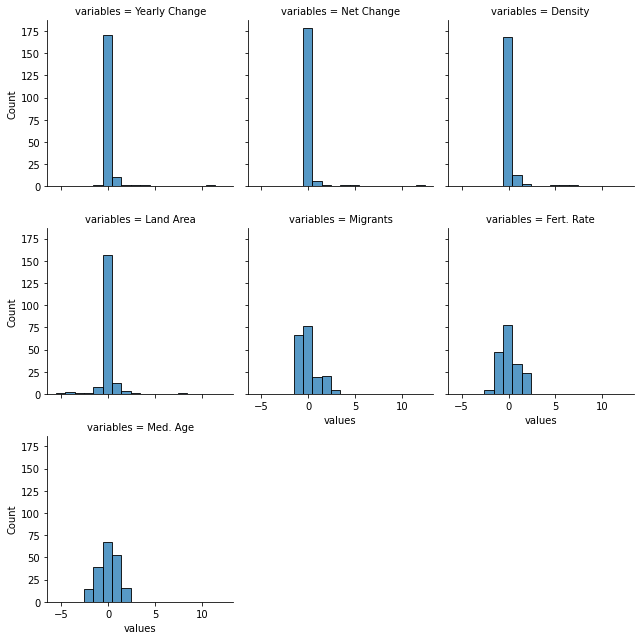

In [27]:
sns.displot(
    a, x="values", col="variables",col_wrap=3,
    binwidth=1, height=3, facet_kws=dict(margin_titles=True)
)

In [28]:
import scipy
for x in range(0,8):  
    print(scipy.stats.normaltest(X_train[x]))

NormaltestResult(statistic=0.06232123982340068, pvalue=0.9693198685000453)
NormaltestResult(statistic=1.6343329177371133, pvalue=0.4416814054888558)
NormaltestResult(statistic=1.575122245264053, pvalue=0.4549530179424043)
NormaltestResult(statistic=20.519595163461744, pvalue=3.501277434667156e-05)
NormaltestResult(statistic=2.9991849381575544, pvalue=0.22322111111955542)
NormaltestResult(statistic=0.698431765427413, pvalue=0.7052408645231245)
NormaltestResult(statistic=3.035835201970176, pvalue=0.21916780690903434)
NormaltestResult(statistic=19.138661337867852, pvalue=6.983811277402913e-05)


In [29]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [30]:
# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X_train = np.append(arr = np.ones((188, 1)).astype(int), values = X_train, axis = 1)
X_opt = X_train [:, [0, 1, 2, 3, 4, 5, 6, 7]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X_train [:, [1, 2, 3, 4, 5, 6, 7]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X_train [:, [1, 2, 4, 5, 6, 7]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

#Here is the optimal with Adj. R-squared (uncentered): 0.830
X_opt = X_train [:, [1, 2, 4, 5, 7]]
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.830
Method:                 Least Squares   F-statistic:                              184.7
Date:                Thu, 29 Apr 2021   Prob (F-statistic):                    1.57e-69
Time:                        17:21:53   Log-Likelihood:                         -97.595
No. Observations:                 188   AIC:                                      205.2
Df Residuals:                     183   BIC:                                      221.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0849      0.041     -2.088      0.038      -0.165      -0.005
x2             0.7234      0.037     19.374      0.000       0.650       0.797
x3             0.2955      0.036      8.194      0.000       0.224       0.367
x4            -0.1595      0.035     -4.574      0.000      -0.228      -0.091
x5             0.1064      0.041      2.574      0.011       0.025       0.188
==============================================================================
Omnibus:                      183.790   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13723.420
Skew:                           3.146   Prob(JB):                         0.00
Kurtosis:                      44.380   Cond. No.                         2.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
df = pd.read_csv('population_total_long.csv')
df

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411
...,...,...,...
12590,Kosovo,2017,1830700
12591,"Yemen, Rep.",2017,27834821
12592,South Africa,2017,57000451
12593,Zambia,2017,16853688


In [32]:
df['Year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [33]:
df.describe()

,Year,Count
count,12595.000000,1.259500e+04
mean,1988.583406,2.377748e+07
std,16.744033,1.002442e+08
min,1960.000000,3.893000e+03
25%,1974.000000,4.758955e+05
50%,1989.000000,4.060260e+06
75%,2003.000000,1.276995e+07
max,2017.000000,1.386395e+09


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12595 entries, 0 to 12594
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  12595 non-null  object
 1   Year          12595 non-null  int64 
 2   Count         12595 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 295.3+ KB


In [35]:
df.isnull().sum()

Country Name    0
Year            0
Count           0
dtype: int64

In [36]:
df.head(50)

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411
5,United Arab Emirates,1960,92418
6,Argentina,1960,20481779
7,Armenia,1960,1874121
8,American Samoa,1960,20123
9,Antigua and Barbuda,1960,54131


In [37]:
#Get world pop data
wd_pop =df.groupby('Year').sum().reset_index()
wd_pop = wd_pop.rename({'Count':'World'},axis=1)

In [38]:
wd_pop

,Year,World
0,1960,3019770047
1,1961,3060517665
2,1962,3113194711
3,1963,3177998236
4,1964,3243186569
5,1965,3309774986
6,1966,3379482152
7,1967,3448841602
8,1968,3518946207
9,1969,3593195361


In [39]:
#Then, China's
cn_pop = df[df['Country Name']=='China'].reset_index().iloc[:,2:]
cn_pop = cn_pop.rename({'Count':'China'},axis=1)

In [40]:
cn_pop

,Year,China
0,1960,667070000
1,1961,660330000
2,1962,665770000
3,1963,682335000
4,1964,698355000
5,1965,715185000
6,1966,735400000
7,1967,754550000
8,1968,774510000
9,1969,796025000


In [53]:
#Now transform the dataframe into what I need
country_name = df['Country Name'].unique()
country_count = len(df['Country Name'].unique())

for x in range(0,country_count):
    x_pop = df[df['Country Name']== country_name[x]].reset_index().iloc[:,2:]
    x_pop = x_pop.rename({'Count':country_name[x]},axis=1)
    wd_pop[country_name[x]]=x_pop[country_name[x]]

In [54]:
#Now I have the data I wanted and then rename it 
pop = wd_pop

In [55]:
wd_pop

,Year,World,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,...,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe,West Bank and Gaza,Serbia,Sint Maarten (Dutch part)
0,1960,3019770047,54211,8996973,5454933,1608800,13411,92418,20481779,1874121,...,63689,108629,947000,5315355,17099840,3070776,3776681,1978248.0,7586000.0,31240.0
1,1961,3060517665,55438,9169410,5531472,1659800,14375,100796,20817266,1941492,...,65705,112105,966000,5393036,17524533,3164329,3905034,2068845.0,7595636.0,31084.0
2,1962,3113194711,56225,9351441,5608539,1711319,15370,112118,21153052,2009526,...,67794,115776,994000,5473671,17965725,3260650,4039201,2163591.0,7646424.0,30519.0
3,1963,3177998236,56695,9543205,5679458,1762621,16412,125130,21488912,2077578,...,69946,119559,1022000,5556766,18423161,3360104,4178726,2262676.0,7699307.0,30600.0
4,1964,3243186569,57032,9744781,5735044,1814135,17469,138039,21824425,2145001,...,72115,123342,1050000,5641597,18896307,3463213,4322861,2366298.0,7734639.0,30777.0
5,1965,3309774986,57360,9956320,5770570,1864791,18549,149857,22159650,2211319,...,74270,127054,1078000,5727751,19384841,3570464,4471177,2474666.0,7625357.0,31472.0
6,1966,3379482152,57715,10174836,5781214,1914573,19647,159976,22494035,2276034,...,76395,130673,1106000,5816247,19888250,3681955,4623351,2587997.0,7617794.0,32488.0
7,1967,3448841602,58055,10399926,5774243,1965598,20758,169771,22828869,2339127,...,78499,134177,1135000,5907874,20406864,3797873,4779827,2706518.0,7596501.0,33011.0
8,1968,3518946207,58386,10637063,5771652,2022272,21890,182627,23168267,2401143,...,80657,137487,1163000,6001852,20942145,3918872,4941906,2776568.0,7567745.0,33441.0
9,1969,3593195361,58726,10893776,5803254,2081695,23058,203106,23517611,2462928,...,82927,140500,1191000,6097035,21496075,4045740,5111337,2848431.0,7540401.0,33811.0


In [75]:
wd_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Columns: 221 entries, Year to Sint Maarten (Dutch part)
dtypes: float64(5), int64(216)
memory usage: 100.3 KB


Text(0, 0.5, 'Population')

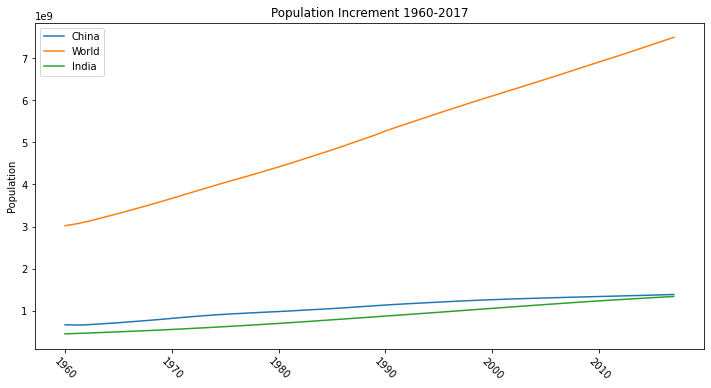

In [44]:
# Plot the pop for China and world
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="China",label="China",
             data = pop)
sns.lineplot(x="Year", y="World",label="World",
             data = pop)
sns.lineplot(x="Year", y="India",label="India",
             data = pop)
plt.xticks(rotation=-45)
plt.title("Population Increment 1960-2017")
plt.xlabel("")
plt.ylabel("Population")

In [45]:
pop2=pop.tail(30)
pop2.Year=pop2.Year.astype(str)

In [46]:
pop2

,Year,World,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,...,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe,West Bank and Gaza,Serbia,Sint Maarten (Dutch part)
28,1988,5082462597,61079,11618005,11068050,3142336,50434,1627066,31668949,3504659,...,139315,161376,1791000,10730862,35100909,7598275,9849125,NaN,NaN,NaN
29,1989,5170966950,61032,11868877,11454777,3227943,52448,1725681,32148134,3536474,...,142794,161940,1827000,11189177,35930050,7820205,10153852,NaN,NaN,NaN
30,1990,5268765084,62149,12412308,11848386,3286542,54509,1828432,32618651,3538171,...,146573,162803,1862000,11709993,36800509,8036845,10432421,NaN,NaN,NaN
31,1991,5356486327,64622,13299017,12248901,3266790,56671,1937153,33079000,3505258,...,150716,163997,1898000,12302124,37718950,8246656,10680995,NaN,NaN,NaN
32,1992,5440572355,68235,14485546,12657366,3247039,58888,2052891,33529326,3442817,...,155170,165490,1932000,12954155,38672607,8451347,10900502,NaN,NaN,NaN
33,1993,5525527377,72504,15816603,13075049,3227287,60971,2173139,33970111,3363108,...,159744,167119,1965000,13634076,39633750,8656486,11092766,NaN,NaN,NaN
34,1994,5609538308,76700,17075727,13503747,3207536,62677,2294385,34402672,3283667,...,164129,168694,1997000,14297613,40564059,8869740,11261744,NaN,NaN,NaN
35,1995,5694397867,80324,18110657,13945206,3187784,63850,2415090,34828170,3217348,...,168158,170054,2029000,14913315,41435758,9096607,11410714,NaN,NaN,NaN
36,1996,5777229835,83200,18853437,14400719,3168033,64360,2539126,35246374,3168221,...,171722,171165,2059000,15469274,42241011,9339733,11541217,NaN,NaN,NaN
37,1997,5859743613,85451,19357126,14871570,3148281,64327,2671362,35657429,3133089,...,174921,172068,2086000,15975668,42987461,9597609,11653242,NaN,NaN,NaN


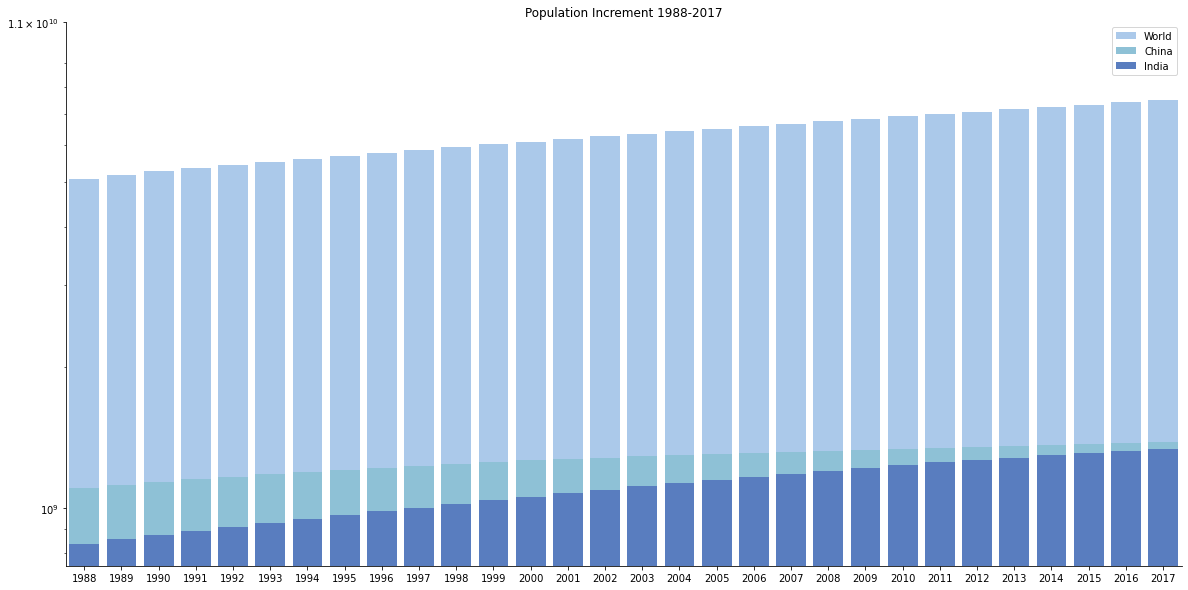

In [47]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Plot the world population
sns.set_color_codes("pastel")
sns.barplot(y="World", x="Year", data=pop2, label="World", color="b")

# Plot the population of China
sns.set_color_codes("muted")
sns.barplot(y="China",x="Year", data = pop2, label = "China", color="c")

# Plot the population of China
sns.set_color_codes("muted")
sns.barplot(y="India",x="Year",  data = pop2, label="India", color="b")

ax.set_yscale('log')
ax.set_yticks(np.arange(10**9, 1.2*10**10, 10**10))

plt.title("Population Increment 1988-2017")
plt.xlabel("")
plt.ylabel("")
# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
sns.despine(left=False, bottom=False)

In [48]:
#Preparation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

#use make_pipeline to combine linear regression with polynomial regression
def PolynomialRegression(degree=2,**kwargs):
    poly_reg = PolynomialFeatures(degree)
    lin_reg = LinearRegression(**kwargs)
    return make_pipeline(poly_reg,lin_reg)

sns.set(rc={'figure.figsize':(10,8)},font='SimHei',font_scale=1.5)

In [49]:
pop

,Year,World,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,...,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe,West Bank and Gaza,Serbia,Sint Maarten (Dutch part)
0,1960,3019770047,54211,8996973,5454933,1608800,13411,92418,20481779,1874121,...,63689,108629,947000,5315355,17099840,3070776,3776681,1978248.0,7586000.0,31240.0
1,1961,3060517665,55438,9169410,5531472,1659800,14375,100796,20817266,1941492,...,65705,112105,966000,5393036,17524533,3164329,3905034,2068845.0,7595636.0,31084.0
2,1962,3113194711,56225,9351441,5608539,1711319,15370,112118,21153052,2009526,...,67794,115776,994000,5473671,17965725,3260650,4039201,2163591.0,7646424.0,30519.0
3,1963,3177998236,56695,9543205,5679458,1762621,16412,125130,21488912,2077578,...,69946,119559,1022000,5556766,18423161,3360104,4178726,2262676.0,7699307.0,30600.0
4,1964,3243186569,57032,9744781,5735044,1814135,17469,138039,21824425,2145001,...,72115,123342,1050000,5641597,18896307,3463213,4322861,2366298.0,7734639.0,30777.0
5,1965,3309774986,57360,9956320,5770570,1864791,18549,149857,22159650,2211319,...,74270,127054,1078000,5727751,19384841,3570464,4471177,2474666.0,7625357.0,31472.0
6,1966,3379482152,57715,10174836,5781214,1914573,19647,159976,22494035,2276034,...,76395,130673,1106000,5816247,19888250,3681955,4623351,2587997.0,7617794.0,32488.0
7,1967,3448841602,58055,10399926,5774243,1965598,20758,169771,22828869,2339127,...,78499,134177,1135000,5907874,20406864,3797873,4779827,2706518.0,7596501.0,33011.0
8,1968,3518946207,58386,10637063,5771652,2022272,21890,182627,23168267,2401143,...,80657,137487,1163000,6001852,20942145,3918872,4941906,2776568.0,7567745.0,33441.0
9,1969,3593195361,58726,10893776,5803254,2081695,23058,203106,23517611,2462928,...,82927,140500,1191000,6097035,21496075,4045740,5111337,2848431.0,7540401.0,33811.0


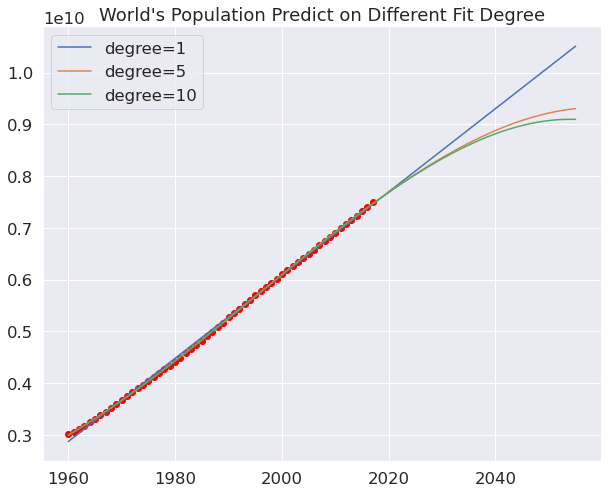

In [88]:
# Polynomial Regression for China's population
# Importing the dataset
dataset=pop[['Year','World']]
y = dataset.iloc[:, 1].values.reshape(-1,1)
X = dataset.iloc[:, 0].values.reshape(-1,1)

X_test = np.linspace(1960,2055,71)[:,None]

plt.scatter(X.ravel(),y,color='red')
plt.axis()
for degree in [1,5,10]:
    regressor = PolynomialRegression(degree).fit(X, y)
    y_test = regressor.predict(X_test)
    plt.plot(X_test.ravel(),y_test,label='degree={0}'.format(degree))
plt.title("World's Population Predict on Different Fit Degree")
plt.legend(loc='best')

In [58]:
dataset

,Year,China
0,1960,667070000
1,1961,660330000
2,1962,665770000
3,1963,682335000
4,1964,698355000
5,1965,715185000
6,1966,735400000
7,1967,754550000
8,1968,774510000
9,1969,796025000


Text(0, 0.5, 'score')

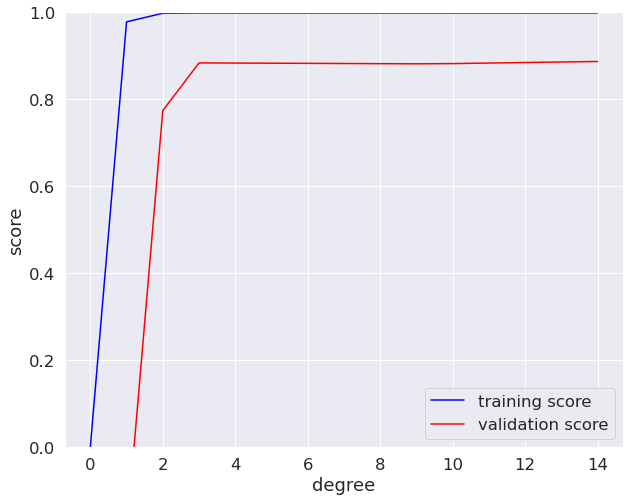

In [55]:
#Finding optimal model
from sklearn.model_selection import validation_curve

degree= np.arange(0,15)
train_score, val_score= validation_curve(PolynomialRegression(),X,y,
        'polynomialfeatures__degree',degree, cv=7)

plt.plot(degree, np.median(train_score,1), 
         color='blue',label='training score')
plt.plot(degree, np.median(val_score,1),
         color='red',label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

In [56]:
#Finding optimal polynomial degree
validation_score=np.median(val_score,1).tolist()
max_index=validation_score.index(max(validation_score))
degree[max_index]

14

(1957.15, 2019.85, 624026750.0, 1422698250.0)

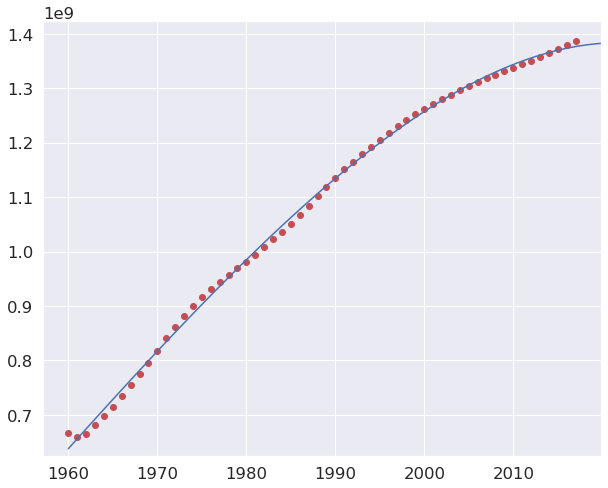

In [57]:
plt.scatter(X.ravel(),y,c='r')
lim= plt.axis()
regressor=PolynomialRegression(14).fit(X, y)
y_test1 = regressor.predict(X_test)
plt.plot(X_test,y_test1)
plt.axis(lim)